In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import sympy as sp

from pend_script import sol
from pend_script import ell_1, ell_2

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

$$
\left[\begin{matrix}\dot{\theta}_{1}\\
\dot{\theta}_{2}\\\dot{\omega}_{1}\\
\dot{\omega}_{2}\end{matrix}\right] = \left[\begin{matrix}{\omega}_{1}\\{\omega}_{2}\\
- \frac{\ell_{2} m_{2} \sin{\left(\theta_{1} - \theta_{2} \right)} \dot{\theta}_{2}^{2} + \ell_{2} m_{2} \cos{\left(\theta_{1} - \theta_{2} \right)} \ddot{\theta}_{2} + g m_{1} \sin{\left(\theta_{1} \right)} + g m_{2} \sin{\left(\theta_{1} \right)}}{\ell_{1} \left(m_{1} + m_{2}\right)}\\\frac{\ell_{1} \sin{\left(\theta_{1} - \theta_{2} \right)} \dot{\theta}_{1}^{2} - \ell_{1} \cos{\left(\theta_{1} - \theta_{2} \right)} \ddot{\theta}_{1} - g \sin{\left(\theta_{2} \right)}}{\ell_{2}}\end{matrix}\right]
$$


In [2]:
theta_1, theta_2, theta_1_dot, theta_2_dot = sol.y
t = sol.t

theta_1_deg = np.rad2deg(theta_1)
theta_1_dot_deg = np.rad2deg(theta_1_dot)
theta_2_deg = np.rad2deg(theta_2)
theta_2_dot_deg = np.rad2deg(theta_2_dot)

np.savetxt(
    "double_pendulum.csv",
    np.transpose([t, theta_1_deg, theta_1_dot_deg, theta_2_deg, theta_2_dot_deg]),
    delimiter=",",
)

In [3]:
# change matplotlib defaults
plt.rcParams["axes.facecolor"] = "black"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["axes.titlecolor"] = "white"
plt.rcParams["figure.facecolor"] = "black"
plt.rcParams["legend.labelcolor"] = "white"
plt.rcParams["xtick.labelcolor"] = "white"
plt.rcParams["ytick.labelcolor"] = "white"
plt.rcParams["grid.color"] = "#707070"

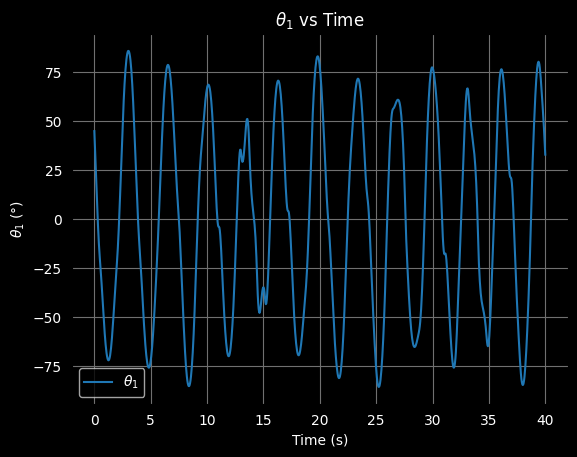

In [4]:
# Plot theta_1 vs time

plt.plot(t, theta_1_deg, label=r"$\theta_1$")
plt.xlabel("Time (s)")
plt.ylabel(r"$\theta_1$ (°)")
plt.title(r"$\theta_1$ vs Time")
plt.legend()
plt.grid()
plt.show()

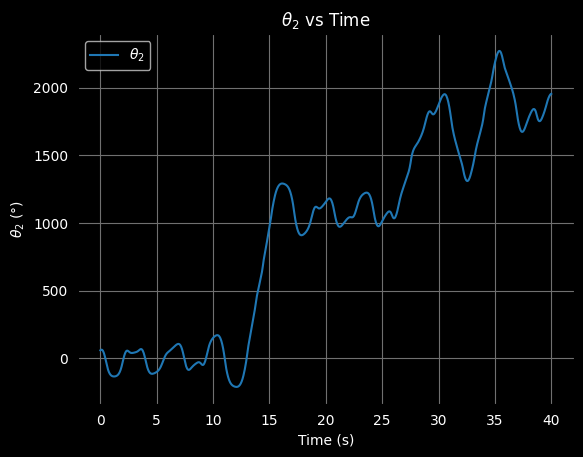

In [5]:
# Plot theta_2 vs time

plt.plot(t, theta_2_deg, label=r"$\theta_2$")
plt.xlabel("Time (s)")
plt.ylabel(r"$\theta_2$ (°)")
plt.title(r"$\theta_2$ vs Time")
plt.legend()
plt.grid()
plt.show()

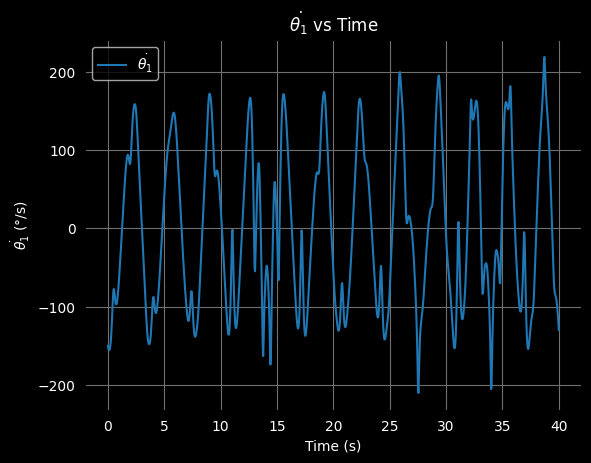

In [6]:
# Plot theta_1_dot vs time

plt.plot(t, theta_1_dot_deg, label=r"$\dot{\theta_1}$")
plt.xlabel("Time (s)")
plt.ylabel(r"$\dot{\theta_1}$ (°/s)")
plt.title(r"$\dot{\theta_1}$ vs Time")
plt.legend()
plt.grid()
plt.show()

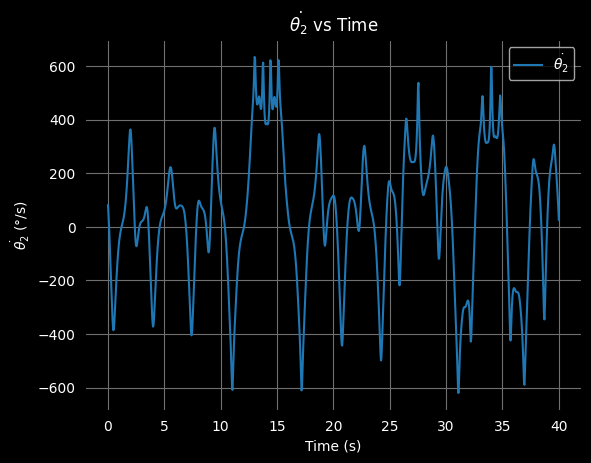

In [7]:
# Plot theta_2_dot vs time

plt.plot(t, theta_2_dot_deg, label=r"$\dot{\theta_2}$")
plt.xlabel("Time (s)")
plt.ylabel(r"$\dot{\theta_2}$ (°/s)")
plt.title(r"$\dot{\theta_2}$ vs Time")
plt.legend()
plt.grid()
plt.show()

We must define a function that takes $theta_1$ and $theta_2$ as arguments and returns the coordinates of the two masses as $x_1$, $y_1$, $x_2$, and $y_2$.


In [11]:
def get_coordinates(t, theta_1, theta_2, ell_1, ell_2):
    return (
        ell_1 * np.sin(theta_1),
        -ell_1 * np.cos(theta_1),
        ell_2 * np.sin(theta_2) + ell_1 * np.sin(theta_1),
        -ell_2 * np.cos(theta_2) - ell_1 * np.cos(theta_1),
    )
    

x1, y1, x2, y2 = get_coordinates(t, theta_1, theta_2, ell_1, ell_2)

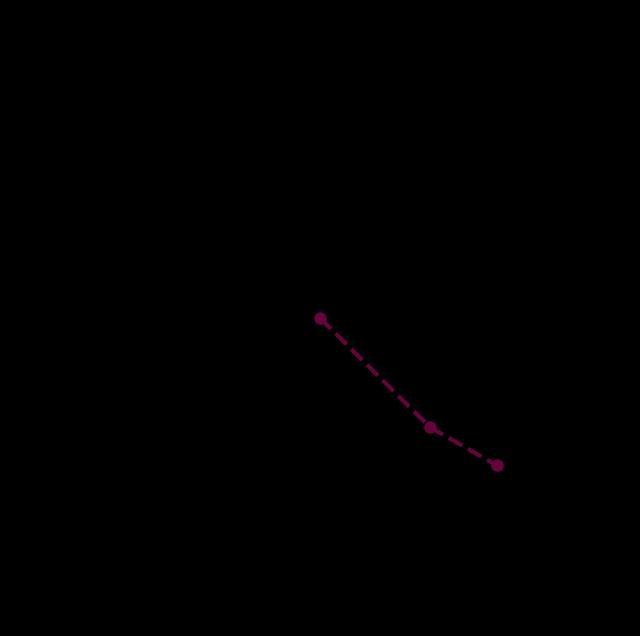

In [18]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_facecolor("k")
ax.get_xaxis().set_ticks([]) # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([]) # enable this to hide y axis ticks

ln1, = plt.plot([], [], lw=3, markersize=8, color="#66023c", marker="o", linestyle="--")

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ani = animation.FuncAnimation(fig, animate, frames=len(x1), interval=50)
ani.save("double_pendulum.gif", writer="pillow", fps=25)